#importing library

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import logging
import matplotlib.pyplot as plt
import plotly.express as px
import boto3
from botocore.exceptions import ClientError
from KEYS import ACCESS_KEY, SECRET_ACCESS_KEY

#function to upload and download file.

In [45]:
s3_client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_ACCESS_KEY
    )

def upload_file(file_name, bucket, object_name=None):
    if object_name is None:
        object_name = os.path.basename(file_name)

    try:
        res = s3_client.upload_file(file_name, bucket, object_name)
        if res:
            print("Successfully uploaded file")
    except ClientError as e:
        logging.error(e)
        return False
    return True

def download_file(file_name, bucket, object_name):
    try:
        res = s3_client.download_file(bucket, object_name, file_name)
        if res:
            print("Successfully downloaded file")
    except ClientError as e:
        logging.error(e)
        return False
    return True

#Downloading File from S3 Bucket

In [46]:
bucket = "capstone-project-team2"
file1 = "LOL_items_stats.csv"
file2 = "lol_champion_stats_en.csv"
file3= "league_of_legends_champion_stats.csv"

download_file(file1, bucket=bucket, object_name=file1)
download_file(file2, bucket=bucket, object_name=file2)
download_file(file3, bucket=bucket, object_name=file3)

True

#Reading File from CSV

In [47]:
df1 = pd.read_csv(file1,encoding='ISO-8859-1', delimiter =';')
df2 = pd.read_csv(file2,encoding='ISO-8859-1', delimiter =';')
df3 = pd.read_csv(file3,encoding='ISO-8859-1', delimiter =',')

#Data Cleaning---> Stats Dataset

In [48]:
#changing the data types to float
cols = ["Cost","Sell", 'AS', 'Crit', 'LS', 'APen', 'AP','AH', 'Mana','MP5','HSP','OVamp', 'MPen', 'Health', 'Armor',"MR","HP5","MS"]
for col_name in cols:
    df1[col_name] = df1[col_name].astype("float")

#Making Item column primary key(nullable=false)
#df1 = df1.withColumn("Item", F.coalesce(F.col("Item"), F.lit(0)))

#replacing null value to unknown for Maps Column
#df1 = df1.na.fill(value="Unknown", subset=["Maps"])
df1["Maps"].fillna("Unknown", inplace = True)
df1.tail()

,Item,Cost,Sell,AD,AS,Crit,LS,APen,AP,AH,...,MP5,HSP,OVamp,MPen,Health,Armor,MR,HP5,MS,Maps
189,Zeal,1050.0,735.0,NaN,0.18,0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All
190,Zeke's Convergence,2400.0,1680.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,250.0,25.0,NaN,NaN,NaN,All
191,Zhonya's Hourglass,2600.0,1820.0,NaN,NaN,NaN,NaN,NaN,65.0,10.0,...,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,All
192,Anathema's Chains,2500.0,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,...,NaN,NaN,NaN,NaN,650.0,NaN,NaN,NaN,NaN,All
193,Hullbreaker,2800.0,1960.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,300.0,NaN,NaN,1.25,NaN,Unknown


#Data Cleaning--> Champion Datasets

In [49]:
#renaming the columns
df2 = df2.rename(columns={'ressource': 'resource'}) 

# Converting champion_name to non-nullable
#df2 = df2.withColumn("champion_name", F.coalesce(F.col("champion_name"), F.lit(0)))

#Changing date release to date datatype
df2['date_release']= pd.to_datetime(df2['date_release'])

# Converting columns to double
cols = cols = ['HP', 'HP+', 'HP_lvl18', 'HP5', 'HP5+', 'HP5_lvl18', 'MP', 'MP+', 'MP_lvl18', 'MP5', 'MP5+', 'MP5_lvl18', 'AD', 'AD+', 'AD_lvl18', 'AS', 'AS_lvl18', 'AR', 'AR+', 'AR_lvl18', 'MR', 'MR+', 'MR_lvl18', 'MS', 'MS_lvl18', 'range', 'range_lvl18']
for col_name in cols:
    df2[col_name] = df2[col_name].astype("float")

#changing the data type of percentage colum AS to float
# df2['AS'] = df2['AS'].str.rstrip('%').astype(float)/100.0

# Displaying table
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   champion_name       161 non-null    object        
 1   champion_title      161 non-null    object        
 2   class               161 non-null    object        
 3   playstyle           161 non-null    object        
 4   date_release        161 non-null    datetime64[ns]
 5   last_change         161 non-null    object        
 6   blue_essence_price  161 non-null    int64         
 7   rp_price            161 non-null    int64         
 8   resource            155 non-null    object        
 9   HP                  161 non-null    float64       
 10  HP+                 161 non-null    float64       
 11  HP_lvl18            161 non-null    float64       
 12  HP5                 161 non-null    float64       
 13  HP5+                161 non-null    float64       

C:\Users\MD_Rahman\AppData\Local\Temp\ipykernel_12448\1296419571.py:8: UserWarning: Parsing '13/06/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df2['date_release']= pd.to_datetime(df2['date_release'])
C:\Users\MD_Rahman\AppData\Local\Temp\ipykernel_12448\1296419571.py:8: UserWarning: Parsing '14/12/2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df2['date_release']= pd.to_datetime(df2['date_release'])
C:\Users\MD_Rahman\AppData\Local\Temp\ipykernel_12448\1296419571.py:8: UserWarning: Parsing '22/07/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df2['date_release']= pd.to_datetime(df2['date_release'])
C:\Users\MD_Rahman\AppData\Local\Temp\ipykernel_12448\1296419571.py:8: UserWarning: Parsing '21/02/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df2['

,champion_name,champion_title,class,playstyle,date_release,last_change,blue_essence_price,rp_price,resource,HP,...,AR,AR+,AR_lvl18,MR,MR+,MR_lvl18,MS,MS_lvl18,range,range_lvl18
0,Aatrox,the Darkin Blade,Fighter,Juggernaut,2013-06-13,V12.4,4800,880,Blood Well,580.0,...,38.0,3.25,93.25,32.0,1.25,53.25,345.0,345.0,175.0,175.0
1,Ahri,the Nine-Tailed Fox,Mage,Burst,2011-12-14,V12.5,3150,790,Mana,500.0,...,18.0,3.50,77.50,30.0,0.50,38.50,330.0,330.0,550.0,550.0
2,Akali,the Rogue Assassin,Slayer,Assassin,2010-11-05,V11.22,3150,790,Energy,500.0,...,23.0,3.50,82.50,37.0,1.25,58.25,345.0,345.0,125.0,125.0
3,Akshan,the Rogue Sentinel,Marksman,Assassin,2021-07-22,V12.3,6300,975,Mana,560.0,...,26.0,3.00,77.00,30.0,0.50,38.50,330.0,330.0,500.0,500.0
4,Alistar,the Minotaur,Tank,Vanguard,2009-02-21,V11.11,1350,585,Mana,600.0,...,44.0,3.50,103.50,32.0,1.25,53.25,330.0,330.0,125.0,125.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Blood Well'),
  Text(1, 0, 'Mana'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'Rage'),
  Text(5, 0, 'Courage'),
  Text(6, 0, 'Shield'),
  Text(7, 0, 'Fury'),
  Text(8, 0, 'Ferocity'),
  Text(9, 0, 'Heat'),
  Text(10, 0, 'Grit'),
  Text(11, 0, 'Bloodthirst')])

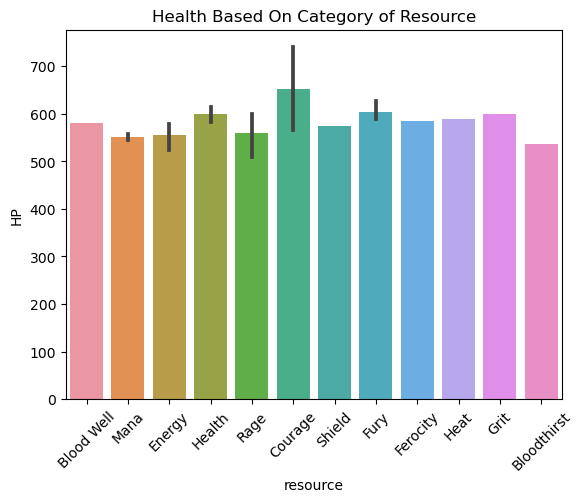

In [50]:
sns.barplot(
    data = df2,
    x = "resource",
    y = "HP"
).set(title='Health Based On Category of Resource')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Matrix')

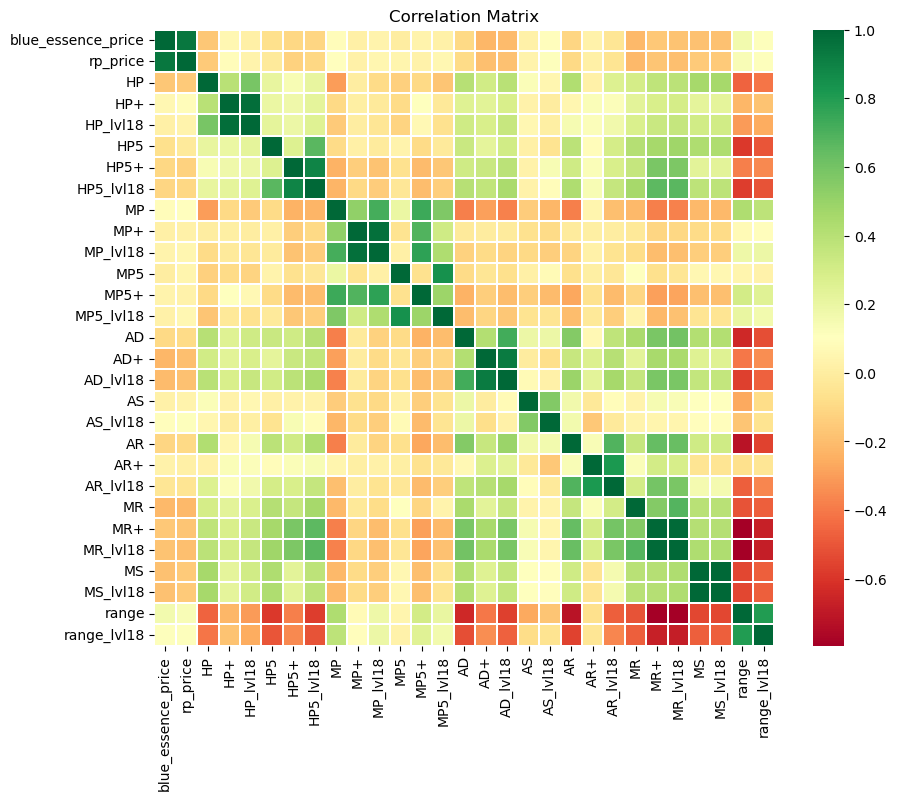

In [51]:
plt.figure(figsize = (10,8))
sns.heatmap(df2.corr(),cmap='RdYlGn',linewidths=0.2 )#data.corr()-->correlation matrix
plt.title('Correlation Matrix')

Data Cleaning-> League of Legends Champions

In [52]:
df3

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,patch_version
0,Aatrox,Fighter,TOP,God,89.50,0.31,50.10%,90.37%,9.85%,20.80%,1.90,12.23
1,Ahri,Mage,MID,A,52.62,-2.26,49.64%,91.71%,5.37%,2.28%,2.40,12.23
2,Akali,Assassin,MID,S,61.16,-4.15,48.46%,75.48%,9.39%,15.86%,2.30,12.23
3,Akali,Assassin,TOP,B,41.14,-1.83,45.46%,23.39%,2.95%,15.86%,1.98,12.23
4,Akshan,Marksman,MID,A,49.05,-0.97,51.55%,64.06%,2.49%,3.87%,2.18,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...
247,Zilean,Support,MID,A,54.98,4.06,54.42%,12.95%,0.53%,1.78%,3.39,12.23
248,Zilean,Support,SUPPORT,A,50.83,-0.62,50.12%,82.19%,3.36%,1.78%,2.96,12.23
249,Zoe,Mage,MID,B,46.03,0.43,48.15%,82.83%,3.19%,1.21%,2.40,12.23
250,Zoe,Mage,SUPPORT,D,31.88,0.11,47.47%,13.59%,0.50%,1.21%,2.16,12.23


In [53]:
#renaming the column
df3 = df3.rename(columns={'Name': 'champion_name', 'Class': 'class'}) 

#change the data types to float and remove %. 
df3['Win %'] = np.round(df3['Win %'].str.rstrip('%').astype(float), 2)
df3['Role %'] = np.round(df3['Role %'].str.rstrip('%').astype(float), 2)
df3['Pick %'] = np.round(df3['Pick %'].str.rstrip('%').astype(float), 2)
df3['Ban %'] = np.round(df3['Ban %'].str.rstrip('%').astype(float), 2)
df3

,champion_name,class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,patch_version
0,Aatrox,Fighter,TOP,God,89.50,0.31,50.10,90.37,9.85,20.80,1.90,12.23
1,Ahri,Mage,MID,A,52.62,-2.26,49.64,91.71,5.37,2.28,2.40,12.23
2,Akali,Assassin,MID,S,61.16,-4.15,48.46,75.48,9.39,15.86,2.30,12.23
3,Akali,Assassin,TOP,B,41.14,-1.83,45.46,23.39,2.95,15.86,1.98,12.23
4,Akshan,Marksman,MID,A,49.05,-0.97,51.55,64.06,2.49,3.87,2.18,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...
247,Zilean,Support,MID,A,54.98,4.06,54.42,12.95,0.53,1.78,3.39,12.23
248,Zilean,Support,SUPPORT,A,50.83,-0.62,50.12,82.19,3.36,1.78,2.96,12.23
249,Zoe,Mage,MID,B,46.03,0.43,48.15,82.83,3.19,1.21,2.40,12.23
250,Zoe,Mage,SUPPORT,D,31.88,0.11,47.47,13.59,0.50,1.21,2.16,12.23


[Text(0.5, 1.0, 'KDA BY Class')]

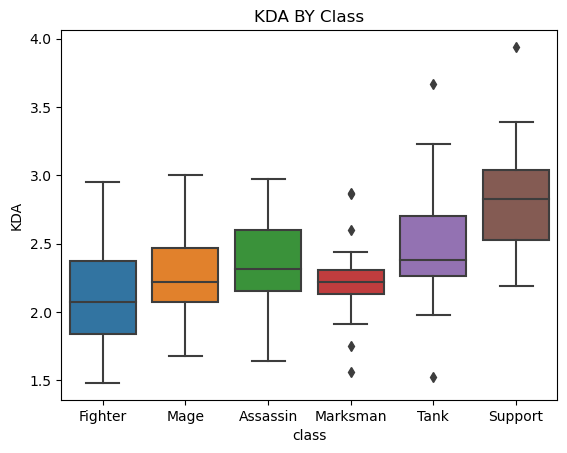

In [54]:
sns.boxplot(data=df3, x='class', y='KDA').set(title='KDA BY Class')

In [55]:
df3.dtypes

champion_name     object
class             object
Role              object
Tier              object
Score            float64
Trend            float64
Win %            float64
Role %           float64
Pick %           float64
Ban %            float64
KDA              float64
patch_version    float64
dtype: object

In [56]:
#merge two dataframes for tableau
df3 = df3.drop(columns="class", axis=1)
df2 = pd.merge(df2, df3, on =["champion_name", "champion_name"])

In [57]:
df2.dtypes

champion_name                 object
champion_title                object
class                         object
playstyle                     object
date_release          datetime64[ns]
last_change                   object
blue_essence_price             int64
rp_price                       int64
resource                      object
HP                           float64
HP+                          float64
HP_lvl18                     float64
HP5                          float64
HP5+                         float64
HP5_lvl18                    float64
MP                           float64
MP+                          float64
MP_lvl18                     float64
MP5                          float64
MP5+                         float64
MP5_lvl18                    float64
AD                           float64
AD+                          float64
AD_lvl18                     float64
AS                           float64
AS+                           object
AS_lvl18                     float64
A

In [58]:
#converting data frame to csv
df1.to_csv('stats.csv')
df2.to_csv('champions.csv')


PermissionError: [Errno 13] Permission denied: 'champions.csv'

In [ ]:
upload_file("stats.csv","upload-bucket-league-of-legends","stats.csv")
upload_file("champions.csv","upload-bucket-league-of-legends","champions.csv")

True